In [18]:
# Import modules
import pandas as pd
import numpy as np
from pathlib import Path
import sqlalchemy
%matplotlib inline
import hvplot.pandas
import plotly.graph_objects as go


In [19]:
# Read in the csv file from the Resources folder
sp500_df = pd.read_csv(
    Path('./Resources/SPY.csv'),
    # index_col ='Date',
    parse_dates=True,
    infer_datetime_format=True
)

In [20]:
# Review the first 5 rows of sp500 returns
sp500_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-11-03,125.269997,126.500000,123.599998,126.250000,103.951668,291174800
1,2011-11-04,125.230003,125.699997,124.010002,125.480003,103.317719,249401600
2,2011-11-07,125.389999,126.389999,124.199997,126.260002,103.959915,196617200
3,2011-11-08,126.919998,128.020004,125.709999,127.879997,105.293808,224426300
4,2011-11-09,124.889999,125.800003,122.860001,123.160004,101.407448,337982000


In [21]:
# Create a SQLite database
database_connection_string ='sqlite:///'

In [22]:
# Create a database engine
engine = sqlalchemy.create_engine(database_connection_string,echo=True)
engine

Engine(sqlite:///)

In [23]:
# Read the table into a DataFrame
sp500_df.to_sql('sp500', engine, index=False, if_exists='replace')
sp500_df = pd.read_sql_table('sp500', con=engine)

2021-11-04 23:47:31,811 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("sp500")
2021-11-04 23:47:31,813 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-04 23:47:31,815 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("sp500")
2021-11-04 23:47:31,817 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-04 23:47:31,822 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-11-04 23:47:31,825 INFO sqlalchemy.engine.Engine 
CREATE TABLE sp500 (
	"Date" TEXT, 
	"Open" FLOAT, 
	"High" FLOAT, 
	"Low" FLOAT, 
	"Close" FLOAT, 
	"Adj Close" FLOAT, 
	"Volume" BIGINT
)


2021-11-04 23:47:31,827 INFO sqlalchemy.engine.Engine [no key 0.00191s] ()
2021-11-04 23:47:31,829 INFO sqlalchemy.engine.Engine COMMIT
2021-11-04 23:47:31,836 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-11-04 23:47:31,880 INFO sqlalchemy.engine.Engine INSERT INTO sp500 ("Date", "Open", "High", "Low", "Close", "Adj Close", "Volume") VALUES (?, ?, ?, ?, ?, ?, ?)
2021-11-04 23:47:31,881 INFO sqlalchemy.engine.Engine 

In [24]:
# Run the database engine to see that the sp500 table was created in the database
engine.table_names()

2021-11-04 23:47:32,679 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2021-11-04 23:47:32,681 INFO sqlalchemy.engine.Engine [raw sql] ()


/Users/patrickbeeson/opt/anaconda3/envs/sqlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  


['sp500']

In [25]:
# Create a query for all the rows and columns in the sp500 table
sp500_query = f"""
SELECT *
FROM sp500
"""
# Display the results of the sp500 query in a new DataFrame
sp500_results_df=pd.read_sql(sp500_query, engine, parse_dates='Date', index_col='Date')
sp500_results_df

2021-11-04 23:47:33,504 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("
SELECT *
FROM sp500
")
2021-11-04 23:47:33,505 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-04 23:47:33,507 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("
SELECT *
FROM sp500
")
2021-11-04 23:47:33,508 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-04 23:47:33,509 INFO sqlalchemy.engine.Engine 
SELECT *
FROM sp500

2021-11-04 23:47:33,510 INFO sqlalchemy.engine.Engine [raw sql] ()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-11-03,125.269997,126.500000,123.599998,126.250000,103.951668,291174800
2011-11-04,125.230003,125.699997,124.010002,125.480003,103.317719,249401600
2011-11-07,125.389999,126.389999,124.199997,126.260002,103.959915,196617200
2011-11-08,126.919998,128.020004,125.709999,127.879997,105.293808,224426300
2011-11-09,124.889999,125.800003,122.860001,123.160004,101.407448,337982000
...,...,...,...,...,...,...
2021-10-27,456.450012,457.160004,453.859985,453.940002,453.940002,72438000
2021-10-28,455.459991,458.399994,455.450012,458.320007,458.320007,51437900
2021-10-29,455.869995,459.559998,455.559998,459.250000,459.250000,70108200


In [26]:
# Drop the Open, High, Low, Close and Volume Columns, keep only Date and AdjClose.
sp500_results_df = sp500_results_df.drop(columns=['Open', 'High', 'Low', 'Close','Volume'])

In [27]:
sp500_results_df.dtypes

Adj Close    float64
dtype: object

# Calculate the Daily Returns 1, 3, 5, 10 year

In [28]:
# Calculate the daily return of the sp500 over the last 10 years
sp500_results_df['daily_return'] = (sp500_results_df['Adj Close']/ sp500_results_df['Adj Close'].shift(1))-1

sp500_results_df


,Adj Close,daily_return
Date,,
2011-11-03,103.951668,NaN
2011-11-04,103.317719,-0.006098
2011-11-07,103.959915,0.006216
2011-11-08,105.293808,0.012831
2011-11-09,101.407448,-0.036910
...,...,...
2021-10-27,453.940002,-0.004430
2021-10-28,458.320007,0.009649
2021-10-29,459.250000,0.002029


In [29]:
# Calculate 1 year daily returns using loc
daily_returns_1_year = sp500_results_df.loc['2020-11-01':'2021-11-01']
                                                           
daily_returns_1_year

,Adj Close,daily_return
Date,,
2020-11-02,325.613251,0.011209
2020-11-03,331.362274,0.017656
2020-11-04,338.767944,0.022349
2020-11-05,345.374878,0.019503
2020-11-06,345.295959,-0.000229
...,...,...
2021-10-26,455.959991,0.000900
2021-10-27,453.940002,-0.004430
2021-10-28,458.320007,0.009649


In [30]:
# Calculate 3 year daily returns using loc
daily_returns_3_year = sp500_results_df.loc['2018-11-01':'2021-11-01']
                                                           
daily_returns_3_year

,Adj Close,daily_return
Date,,
2018-11-01,259.438446,0.010642
2018-11-02,257.901794,-0.005923
2018-11-05,259.324677,0.005517
2018-11-06,260.965576,0.006328
2018-11-07,266.552612,0.021409
...,...,...
2021-10-26,455.959991,0.000900
2021-10-27,453.940002,-0.004430
2021-10-28,458.320007,0.009649


In [31]:

# Calculate 5 year daily returns using loc
daily_returns_5_year = sp500_results_df.loc['2016-11-01':'2021-11-01']
                                                           
daily_returns_5_year 

,Adj Close,daily_return
Date,,
2016-11-01,192.666611,-0.007246
2016-11-02,191.507019,-0.006019
2016-11-03,190.630463,-0.004577
2016-11-04,190.420456,-0.001102
2016-11-07,194.620590,0.022057
...,...,...
2021-10-26,455.959991,0.000900
2021-10-27,453.940002,-0.004430
2021-10-28,458.320007,0.009649


In [32]:
# Calculate 10 year daily returns using loc
daily_returns_10_year = sp500_results_df.loc['2011-11-01':'2021-11-01']
                                                           
daily_returns_10_year 

,Adj Close,daily_return
Date,,
2011-11-03,103.951668,NaN
2011-11-04,103.317719,-0.006098
2011-11-07,103.959915,0.006216
2011-11-08,105.293808,0.012831
2011-11-09,101.407448,-0.036910
...,...,...
2021-10-26,455.959991,0.000900
2021-10-27,453.940002,-0.004430
2021-10-28,458.320007,0.009649


# Calculate the cumulative returns 1,3, 5, 10 Year

In [33]:
# Calculate the 1 year cumulative returns using the cumprod() function

sp500_cumulative_1_year_return = (1 + daily_returns_1_year['daily_return']).cumprod()-1
sp500_cumulative_1_year_return

Date
2020-11-02    0.011209
2020-11-03    0.029062
2020-11-04    0.052061
2020-11-05    0.072579
2020-11-06    0.072334
                ...   
2021-10-26    0.416007
2021-10-27    0.409734
2021-10-28    0.423336
2021-10-29    0.426224
2021-11-01    0.428678
Name: daily_return, Length: 252, dtype: float64

<AxesSubplot:xlabel='Date'>

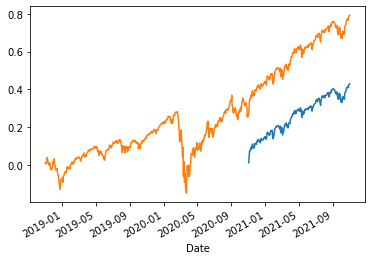

In [38]:
sp500_cumulative_1_year_return.plot()
sp500_cumulative_3_year_return.plot()


In [39]:
# Calculate the 3 year cumulative returns using the cumprod() function

sp500_cumulative_3_year_return = (1 + daily_returns_3_year['daily_return']).cumprod()-1
sp500_cumulative_3_year_return

Date
2018-11-01    0.010642
2018-11-02    0.004656
2018-11-05    0.010199
2018-11-06    0.016591
2018-11-07    0.038355
                ...   
2021-10-26    0.776191
2021-10-27    0.768322
2021-10-28    0.785385
2021-10-29    0.789007
2021-11-01    0.792085
Name: daily_return, Length: 755, dtype: float64

In [40]:
# Calculate the 5 year cumulative returns using the cumprod() function

sp500_cumulative_5_year_return = (1 + daily_returns_5_year['daily_return']).cumprod()-1

sp500_cumulative_5_year_return

Date
2016-11-01   -0.007246
2016-11-02   -0.013221
2016-11-03   -0.017737
2016-11-04   -0.018819
2016-11-07    0.002823
                ...   
2021-10-26    1.349428
2021-10-27    1.339019
2021-10-28    1.361588
2021-10-29    1.366380
2021-11-01    1.370451
Name: daily_return, Length: 1259, dtype: float64

In [41]:
# Calculate the 10 year cumulative returns using the cumprod() function

sp500_cumulative_10_year_return = (1 + daily_returns_10_year['daily_return']).cumprod()-1

sp500_cumulative_10_year_return

Date
2011-11-03         NaN
2011-11-04   -0.006098
2011-11-07    0.000079
2011-11-08    0.012911
2011-11-09   -0.024475
                ...   
2021-10-26    3.386269
2021-10-27    3.366837
2021-10-28    3.408972
2021-10-29    3.417919
2021-11-01    3.425518
Name: daily_return, Length: 2515, dtype: float64

# Calculate the 1, 3, 5, 10 Year Mean 

In [42]:
# Calculate the sp500 1 year mean
SP500_1_year_mean = daily_returns_1_year['daily_return'].mean()

SP500_1_year_mean


0.0014483720836775237

In [43]:
# Calculate the sp500 3 year mean
SP500_3_year_mean = daily_returns_3_year['daily_return'].mean()
SP500_3_year_mean

0.0008730592175987743

In [44]:
# Calculate the sp500 5 year mean
SP500_5_year_mean = daily_returns_5_year['daily_return'].mean()
SP500_5_year_mean

0.0007558128024750944

In [45]:
# Calculate the sp500 10 year mean
SP500_10_year_mean = daily_returns_10_year['daily_return'].mean()
SP500_10_year_mean

0.0006446516501517348

# Calculate the standard deviation for each period

In [46]:
# One year standard deviation
sp500_std_dev_1_year = daily_returns_1_year['daily_return'].std()
sp500_std_dev_1_year

0.007978336183989644

In [47]:
# Three year standard deviation
sp500_std_dev_3_year = daily_returns_3_year['daily_return'].std()
sp500_std_dev_3_year

0.014104258739463622

In [48]:
# Five year standard deviation
sp500_std_dev_5_year = daily_returns_5_year['daily_return'].std()
sp500_std_dev_5_year

0.011799544405671708

In [49]:
# Ten year standard deviation
sp500_std_dev_10_year = daily_returns_10_year['daily_return'].std()
sp500_std_dev_10_year

0.010256481717718254

# Calculate the Annualized Returns

In [50]:
# SP500 one year annualized return
# set variable Trading Days to 252 days per year the market is open

trading_days = 252

sp500_1_year_annualized_return = (daily_returns_1_year['daily_return'].mean() * trading_days) *100

sp500_1_year_annualized_return

36.4989765086736

In [51]:
# SP500 3 year annualized return

sp500_3_year_annualized_return = (daily_returns_3_year['daily_return'].mean() * trading_days) *100
sp500_3_year_annualized_return

22.00109228348911

In [52]:
# SP500 5 year annualized return

sp500_5_year_annualized_return = (daily_returns_5_year['daily_return'].mean() * trading_days) * 100
sp500_5_year_annualized_return

19.04648262237238

In [53]:
# SP500 10 year annualized return

sp500_10_year_annualized_return = (daily_returns_10_year['daily_return'].mean() * trading_days) * 100
sp500_10_year_annualized_return

16.245221583823717

# Summary Stats for each time period (1, 3, 5, 10)

In [54]:
# Daily Returns 1 year - summary stats
daily_returns_1_year.describe()

,Adj Close,daily_return
count,252.000000,252.000000
mean,406.380186,0.001448
std,32.291982,0.007978
min,325.613251,-0.024440
25%,378.507355,-0.002705
50%,413.289505,0.001559
75%,434.729225,0.006343
max,460.040009,0.024240


In [55]:
# Daily Returns 3 year - summary stats
daily_returns_3_year.describe()

,Adj Close,daily_return
count,755.000000,755.000000
mean,328.023522,0.000873
std,62.684121,0.014104
min,218.017075,-0.109424
25%,278.103989,-0.003693
50%,311.800140,0.001568
75%,378.388519,0.007076
max,460.040009,0.090603


In [56]:
# Daily Returns 5 year - summary stats
daily_returns_5_year.describe()

,Adj Close,daily_return
count,1259.000000,1259.000000
mean,292.188959,0.000756
std,66.864110,0.011800
min,190.420456,-0.109424
25%,246.612488,-0.002797
50%,273.632721,0.000930
75%,325.378983,0.005707
max,460.040009,0.090603


In [57]:
# Daily Returns 10 year - summary stats
daily_returns_10_year.describe()

,Adj Close,daily_return
count,2515.000000,2514.000000
mean,224.306436,0.000645
std,85.385614,0.010256
min,95.791985,-0.109424
25%,163.276153,-0.003225
50%,198.511902,0.000710
75%,273.646897,0.005340
max,460.040009,0.090603


# Annualized Standard Deviation

In [58]:
# Calculate the Annual Standard Deviation on ten years of SP500 daily returns

annual_std_dev_sp500_10_year = daily_returns_10_year.std() * np.sqrt(trading_days)

# Display the results
annual_std_dev_sp500_10_year

Adj Close       1355.454594
daily_return       0.162817
dtype: float64

# Sharpe Ratio

In [59]:
# Calculate the Sharpe Ratio on the 10 year sp500 return
sharpe_ratio_sp500_10_year = sp500_10_year_annualized_return / annual_std_dev_sp500_10_year
sharpe_ratio_sp500_10_year

Adj Close        0.011985
daily_return    99.776200
dtype: float64

# Year end balances after initial investment of $10000

In [60]:
# Account balance after 1 year investing in SP500
invest_amount = 10000

sp500_1yr_bal = invest_amount + (invest_amount * sp500_1_year_annualized_return /100) * 1
sp500_1yr_bal

13649.89765086736

In [61]:
# Account balance after 3 year investing in SP500

sp500_3yr_bal = invest_amount + (invest_amount * sp500_3_year_annualized_return /100) * 3
sp500_3yr_bal

16600.327685046734

In [62]:
# Account balance after 5 year investing in SP500

sp500_5yr_bal = invest_amount + (invest_amount * sp500_5_year_annualized_return /100) * 5
sp500_5yr_bal

19523.24131118619

In [63]:
# Account balance after 10 year investing in SP500

sp500_10yr_bal = invest_amount + (invest_amount * sp500_10_year_annualized_return /100) * 10
sp500_10yr_bal

26245.221583823717

# Return on Investment

In [64]:
# ROI 1 year
sp500_1yr_ROI = ((sp500_1yr_bal - invest_amount) / invest_amount) * 100
sp500_1yr_ROI

36.4989765086736

In [65]:
# ROI 3 year
sp500_3yr_ROI = ((sp500_3yr_bal - invest_amount) / invest_amount) * 100
sp500_3yr_ROI

66.00327685046734

In [66]:
# ROI 5 year
sp500_5yr_ROI = ((sp500_5yr_bal - invest_amount) / invest_amount) * 100
sp500_5yr_ROI

95.2324131118619

In [67]:
# ROI 10 year
sp500_10yr_ROI = ((sp500_10yr_bal - invest_amount) / invest_amount) * 100
sp500_10yr_ROI

162.45221583823718

In [70]:
dcc.Dropdown( id = 'dropdown',
options = [
    {'label':'Google', 'value':'GOOG' },
    {'label': 'Apple', 'value':'AAPL'},
    {'label': 'Amazon', 'value':'AMZN'},
    ],
value = 'GOOGL'       
)

NameError: name 'dcc' is not defined